 No Brasil, as barragens fazem parte do escopo de regulação da ANA - Agência Nacional de Águas e Saneamento Básico. A principal lei no que diz respeito às barragens é a lei 12.334/2010, chamada de Política Nacional de Segurança de Barragens. De acordo com o site da ANA, essa lei cria regras para a acumulação de água, de resíduos industriais e a disposição final ou temporária de rejeitos. Essa política também estabelece que a Agência Nacional de Águas (ANA) é a responsável por organizar, implantar e gerir o Sistema Nacional de Informações sobre Segurança de Barragens (SNISB); promover a articulação entre os órgãos fiscalizadores de barragens; coordenar a elaboração do Relatório de Segurança de Barragens (RSB); e receber denúncias dos demais órgãos ou entidades fiscalizadores sobre qualquer não conformidade que implique em risco imediato à segurança ou qualquer acidente ocorrido nas barragens.

 ## Conclusão:

De todas as barragens categorizadas a maioria são de baixo risco e essas tem alto potencial de dano no caso de rompimento, sendo que 324 das 714 barragens do Brasil estão no estado de Minas Gerais.

Das 714 barragens listadas, apenas 390 possuem categorias de risco e dano associados, ou seja, 45% das barragens do país são desconhecidas em termos de risco e dano potencial o que leva a necessidade de maior fiscalização e classificação dessas barragnes pelos orgãos públicos.

# Importando bibliotecas

In [ ]:
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
#!pip install -U pandas-profiling
!pip install sweetviz
!pip install autoviz
!pip install line-profiler
!pip install nb-black
!pip install ipython
import IPython
import folium
import pandas as pd
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport
import line_profiler
profile = line_profiler.LineProfiler()
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import seaborn as sns
import sys
import os 
import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
from pandas import DataFrame, Series
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings('ignore')




/bin/bash: {sys.executable}: command not found
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Imported AutoViz_Class version: 0.0.71. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [ ]:

sns.set()


# Todas as versões do Relatorio de Segurança de Barragens podem ser acessadas através do link:

http://www.snisb.gov.br/portal/snisb.

# Leitura dos dataset

In [ ]:
# Mostrar todas as colunas da base:
pd.set_option('display.max_columns', None)


dados_barragens =pd.read_csv('/content/database_versao_LatLongDecimal_fonteANM_23_01_2019.csv' ,
    sep=",",
    decimal=",",
    dtype={
        "LATITUDE": "string",
        "LONGITUDE": "string",
        "NOME_BARRAGEM_MINERACAO": "string",
        "CPF_CNPJ": "string",
    },
)


# Limpeza de Dados (Data Cleaning)
O primeiro processo deste estudo será realizar a limpeza e tratativa dos dados. Vamos inicialmente verificar como a tabela do arquivo "barragens2019" é apresentada.

In [ ]:
dados_barragens.head(3)

,NOME_BARRAGEM_MINERACAO,NOME_DO_EMPREENDEDOR,CPF_CNPJ,POSICIONAMENTO,UF,MUNICIPIO,MINERIO_PRINCIPAL,ALTURA_ATUAL_metros,VOLUME_ATUAL_m3,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE
0,0-1,Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,22.00,"27,700,000.00",Baixa,Média,C,Sim,0.733361111111111,-60.1383888888889
1,103 (Cruz),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,10.30,"924,000.00",Baixa,Média,C,Sim,0.785722222222222,-60.1419166666667
2,111 (Índio),Mineração Taboca S.a.,34.019.992/0001-10,Sul do Equador,AM,PRESIDENTE FIGUEIREDO,Minério de Estanho Primário,5.00,"48,873.00",Baixa,Média,C,Sim,0.789666666666667,-60.1442777777778


# O pandas profiling é uma ferramenta que gera um relatório html com informações estatísticas e as principais características do seu dataframe em apenas uma linha de código¶


In [ ]:
# Relatorio visual das colunas do dataframe
pandas_profiling.ProfileReport(dados_barragens,  title = "Relatório de criação de perfil do Pandas")


In [ ]:
profile =pandas_profiling.ProfileReport(dados_barragens)

In [ ]:
profile.to_file("barragensreport.html")

# Sweetviz é uma biblioteca python que se concentra em explorar os dados com a ajuda de belas visualizações de alta densidade. Ele não apenas automatiza o EDA, mas também é usado para comparar conjuntos de dados e fazer inferências a partir deles.¶


In [ ]:
# cria o reporte e chama de my_report
my_report = sv.analyze(dados_barragens) 
my_report.show_html()

# sv.anlyze(dados_barragens).show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Autoviz é uma biblioteca python de código aberto que trabalha principalmente na visualização da relação dos dados, pode encontrar os recursos mais impactantes e traçar a visualização criativa em apenas uma linha de código. Autoviz é incrivelmente rápido e altamente útil.¶


Shape of your Data Set: (714, 15)
Classifying variables in data set...
    15 Predictors classified...
        This does not include the Target column(s)
    7 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Time to run AutoViz (in seconds) = 2.588


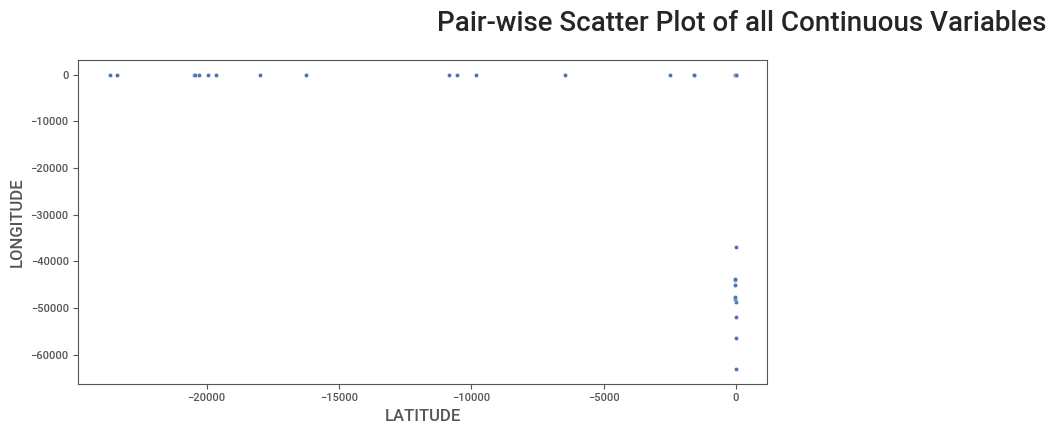

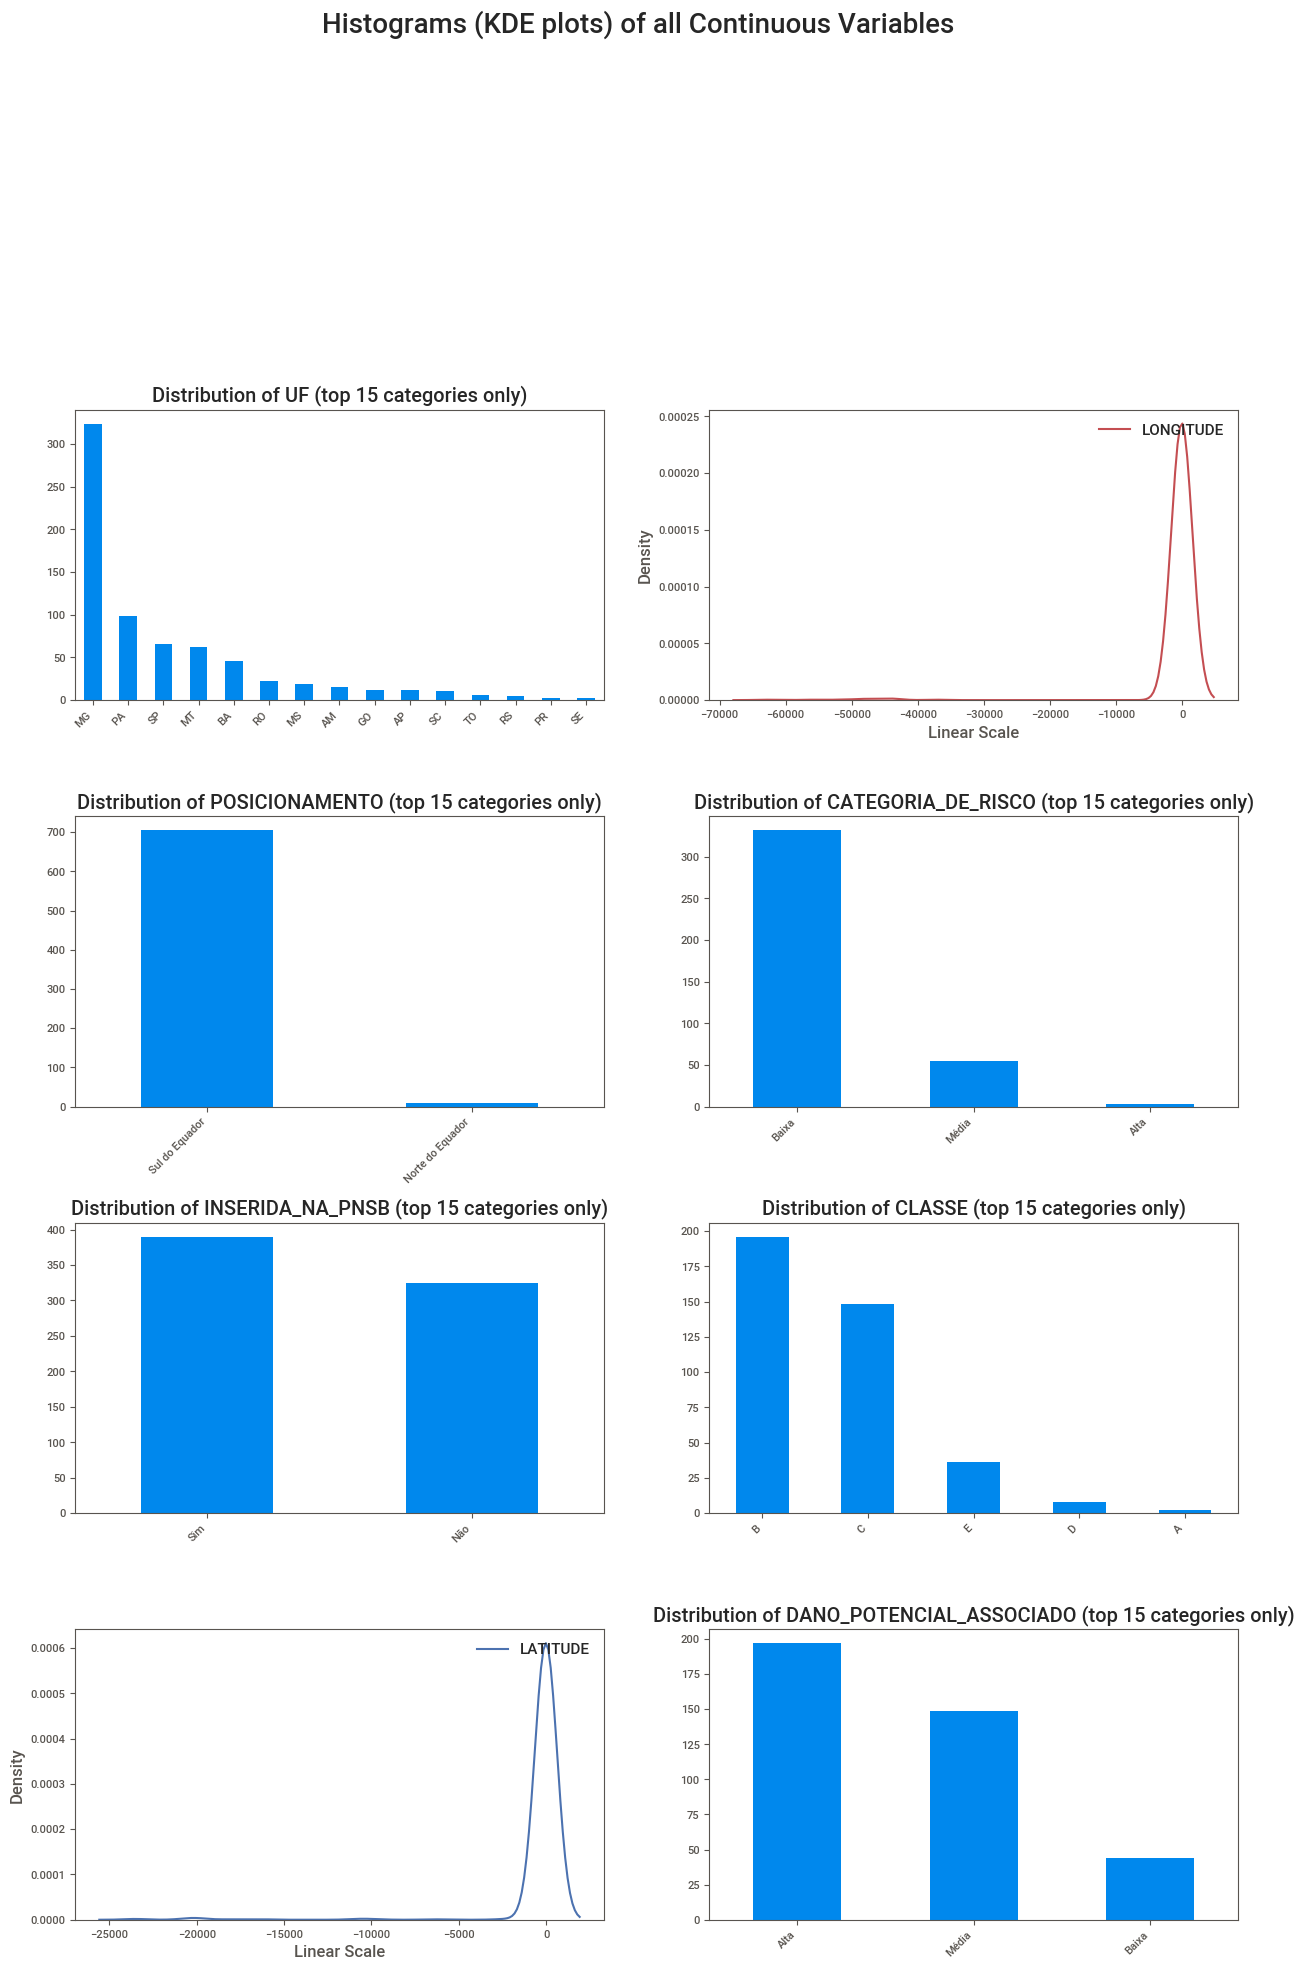

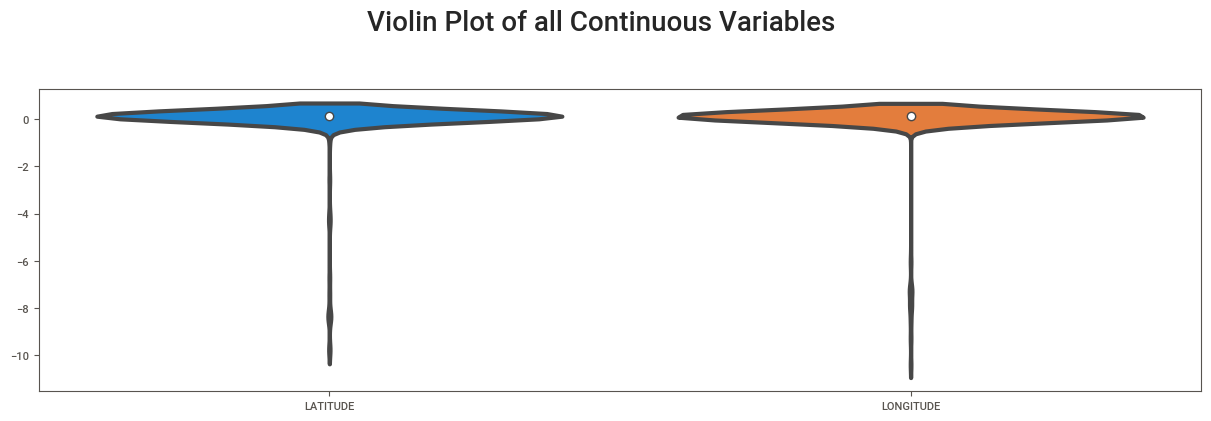

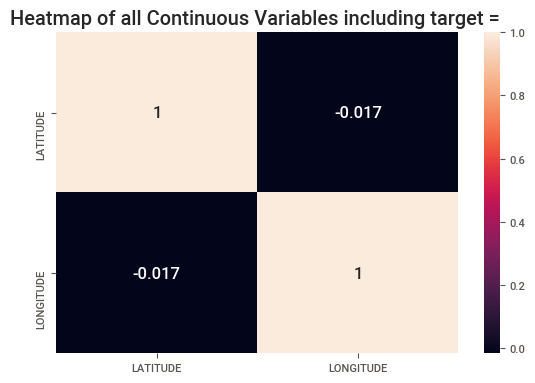

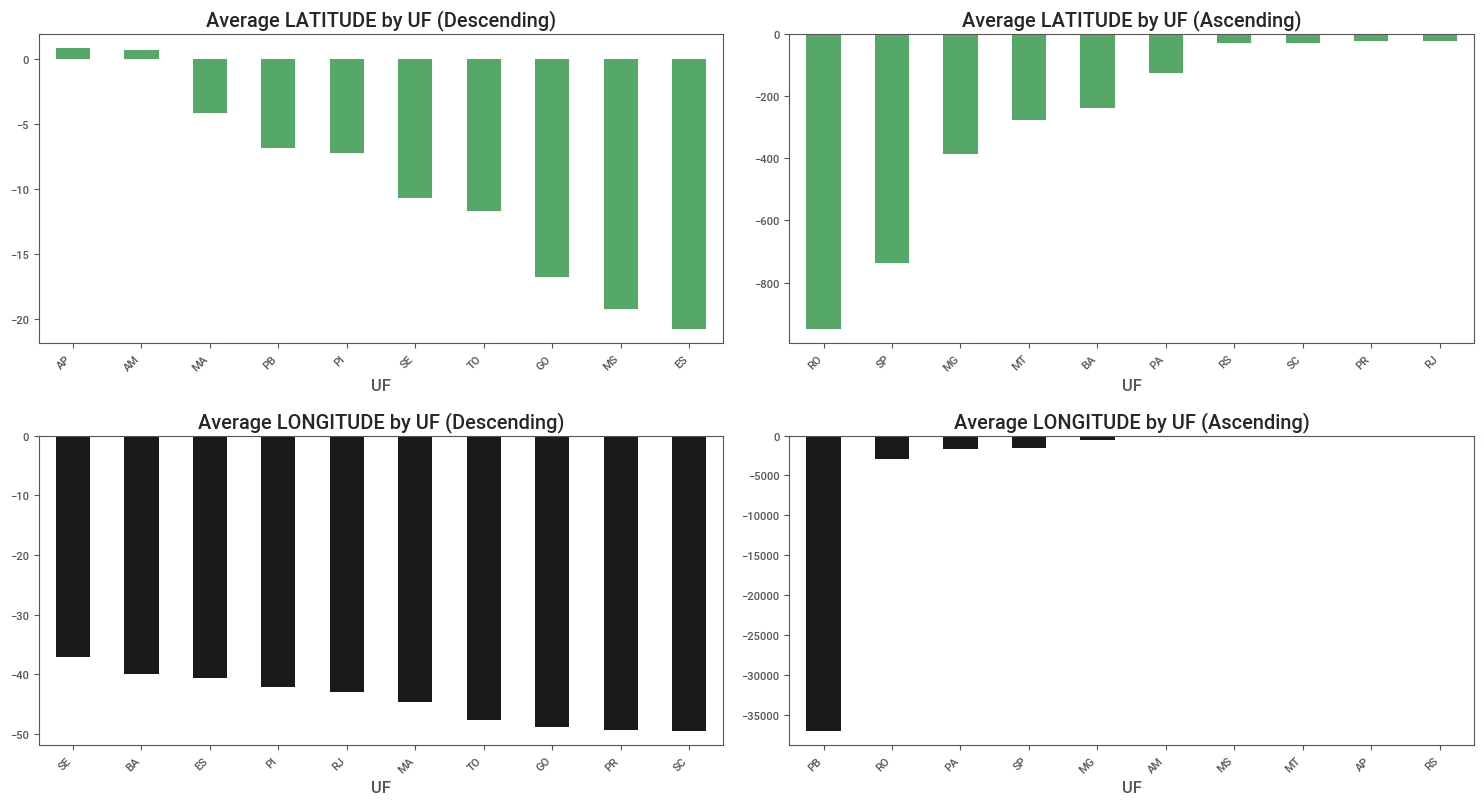

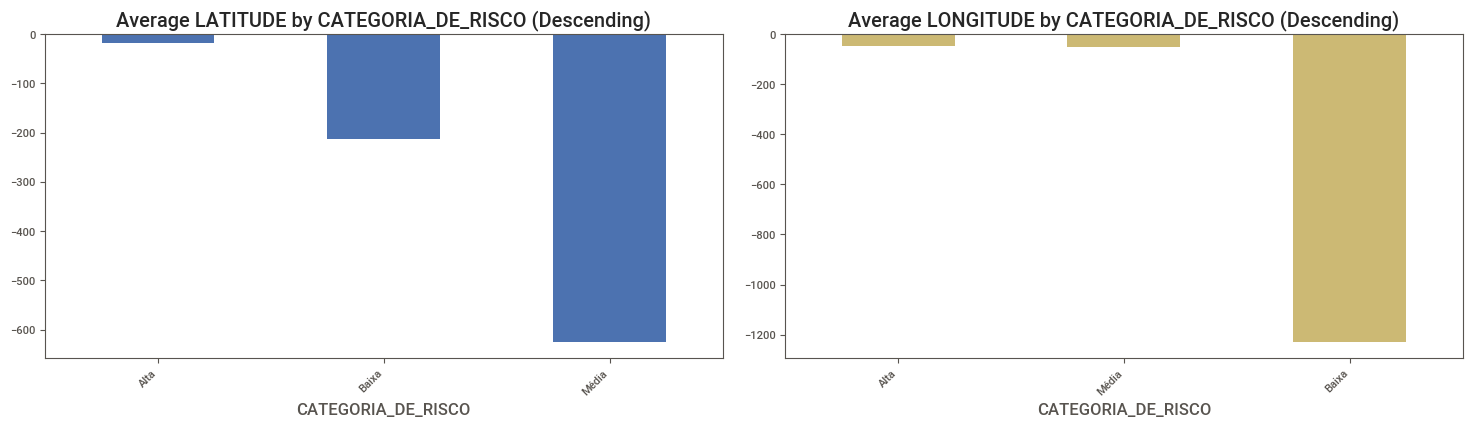

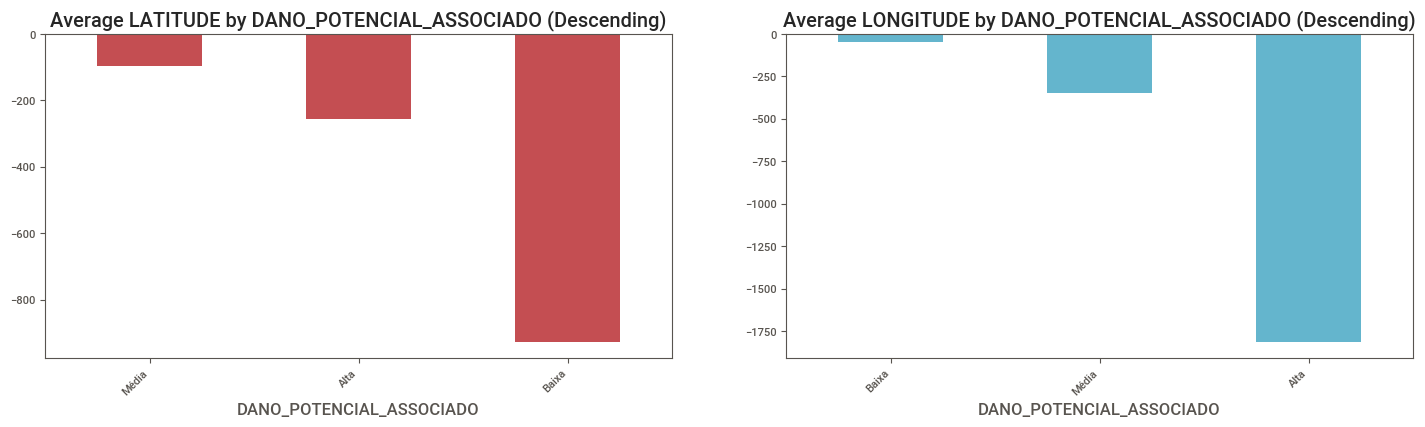

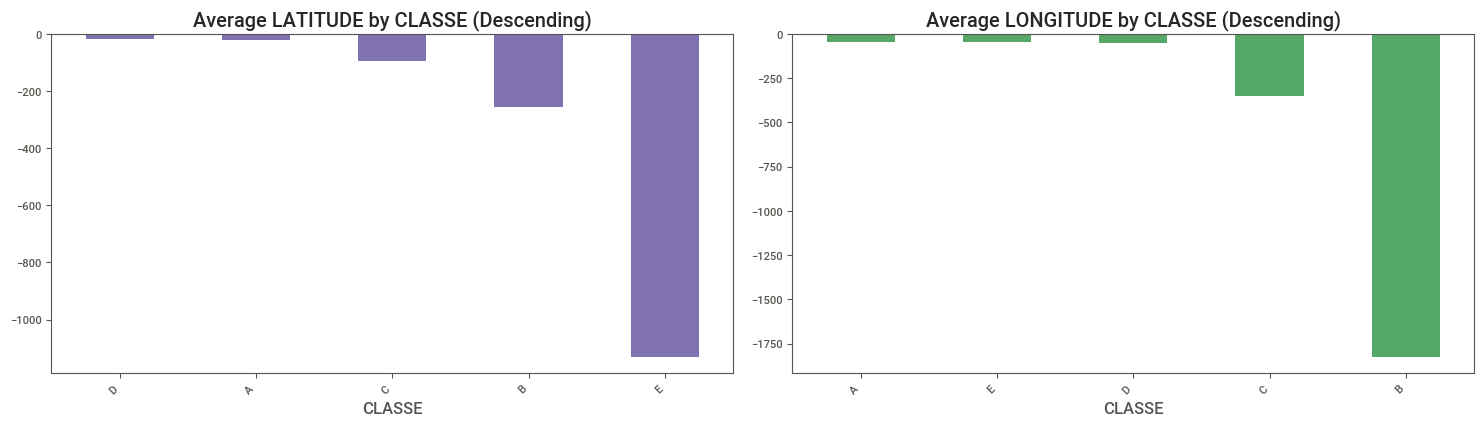

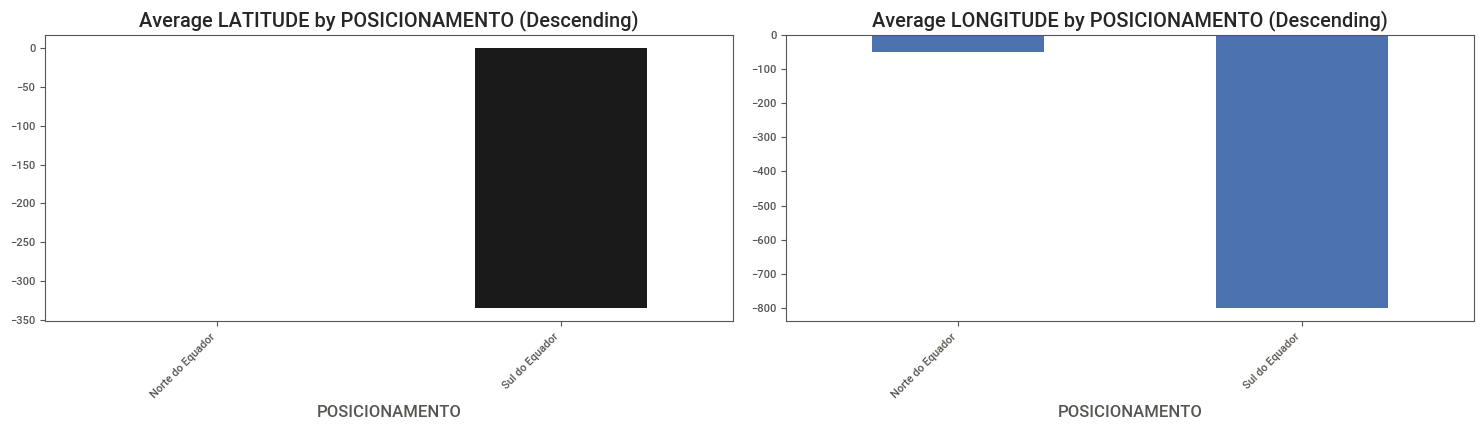

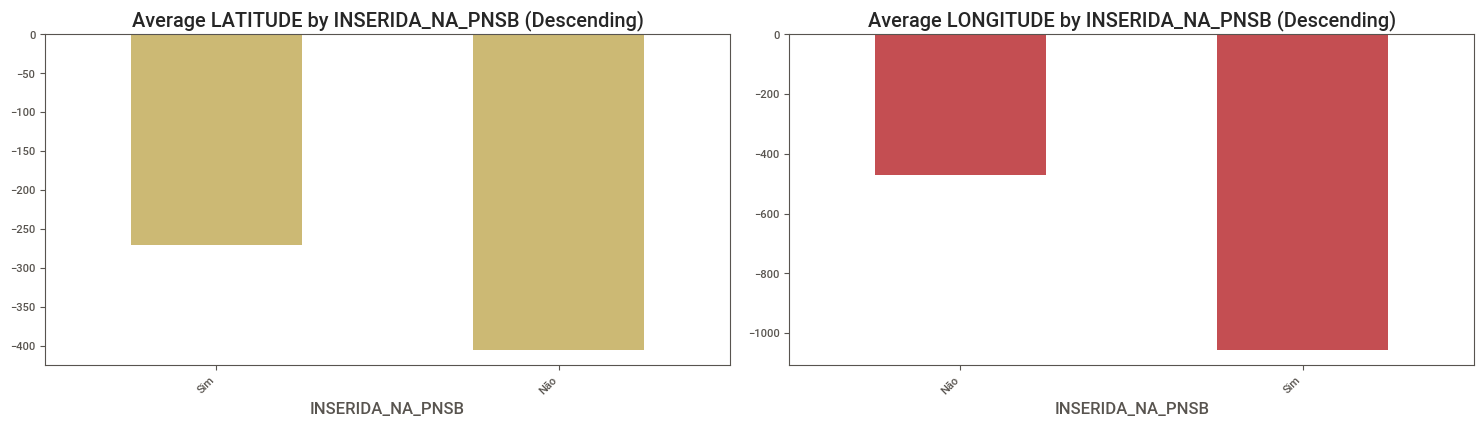

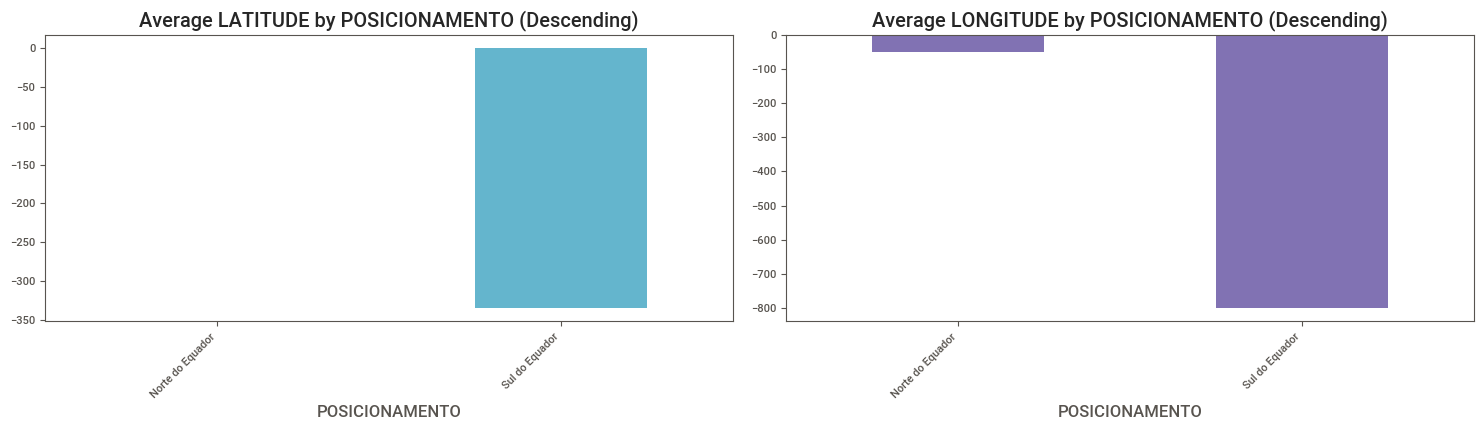

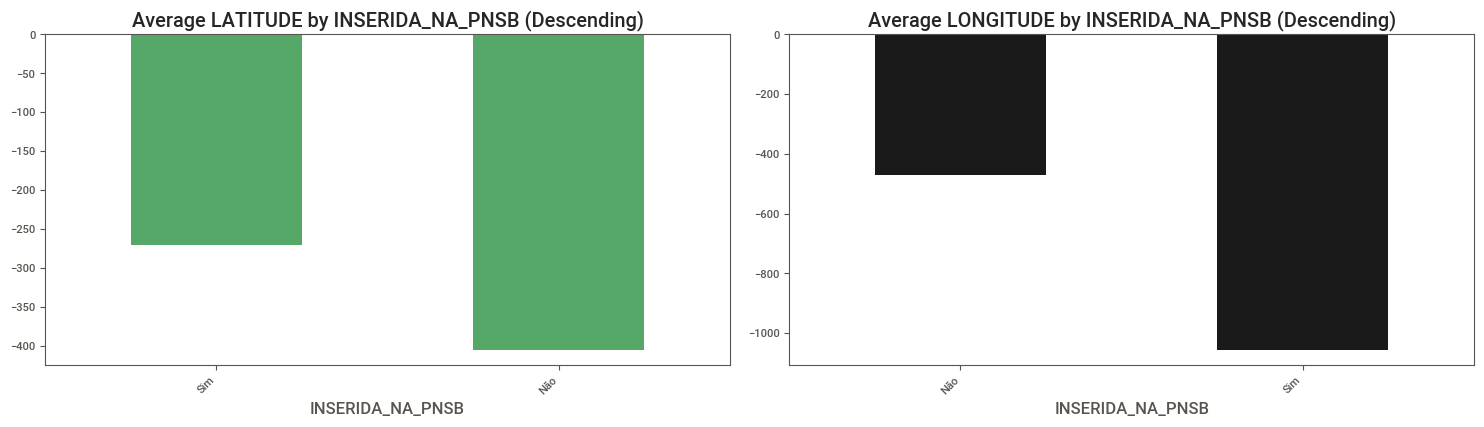

In [ ]:
dados_barragens = AV.AutoViz ("database_versao_LatLongDecimal_fonteANM_23_01_2019.csv")

In [ ]:
dados_barragens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   POSICIONAMENTO            714 non-null    object 
 1   UF                        714 non-null    object 
 2   CATEGORIA_DE_RISCO        390 non-null    object 
 3   DANO_POTENCIAL_ASSOCIADO  390 non-null    object 
 4   CLASSE                    390 non-null    object 
 5   INSERIDA_NA_PNSB          714 non-null    object 
 6   LATITUDE                  714 non-null    float64
 7   LONGITUDE                 714 non-null    float64
dtypes: float64(2), object(6)
memory usage: 44.8+ KB


In [ ]:
#tamnaho do dataframe
dados_barragens.shape

(714, 8)

In [ ]:
dados_barragens.head().T

,0,1,2,3,4
POSICIONAMENTO,Sul do Equador,Sul do Equador,Sul do Equador,Sul do Equador,Sul do Equador
UF,AM,AM,AM,AM,AM
CATEGORIA_DE_RISCO,Baixa,Baixa,Baixa,Baixa,Baixa
DANO_POTENCIAL_ASSOCIADO,Média,Média,Média,Alta,Média
CLASSE,C,C,C,B,C
INSERIDA_NA_PNSB,Sim,Sim,Sim,Sim,Sim
LATITUDE,0.733361,0.785722,0.789667,0.738028,0.732287
LONGITUDE,-60.1384,-60.1419,-60.1443,-60.0789,-60.069


In [ ]:
# contagem de missing
dados_barragens.isna().sum()

POSICIONAMENTO                0
UF                            0
CATEGORIA_DE_RISCO          324
DANO_POTENCIAL_ASSOCIADO    324
CLASSE                      324
INSERIDA_NA_PNSB              0
LATITUDE                      0
LONGITUDE                     0
dtype: int64

In [ ]:
# contagem de missing em porcentagem
dados_barragens.isna().mean()

POSICIONAMENTO              0.000000
UF                          0.000000
CATEGORIA_DE_RISCO          0.453782
DANO_POTENCIAL_ASSOCIADO    0.453782
CLASSE                      0.453782
INSERIDA_NA_PNSB            0.000000
LATITUDE                    0.000000
LONGITUDE                   0.000000
dtype: float64

In [ ]:
# Verificando a quantidade de valores nulos no dataset.
total = dados_barragens.isnull().sum().sort_values(ascending=False)
percent = dados_barragens.isnull().sum()/dados_barragens.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, sort=False, keys=['total', 'percent'])
missing_data[missing_data['percent']!=0]

,total,percent
CLASSE,324,0.453782
DANO_POTENCIAL_ASSOCIADO,324,0.453782
CATEGORIA_DE_RISCO,324,0.453782


In [ ]:
# Ausência da informação de risco para mais de 40% da base
dados_barragens[dados_barragens["CATEGORIA_DE_RISCO"].isna()].head(4)

,POSICIONAMENTO,UF,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE
390,Sul do Equador,AM,NaN,NaN,NaN,Não,0.738639,-60.167389
391,Sul do Equador,AM,NaN,NaN,NaN,Não,0.723528,-60.196722
392,Sul do Equador,AM,NaN,NaN,NaN,Não,0.743194,-60.201417
393,Sul do Equador,AM,NaN,NaN,NaN,Não,0.789556,-60.013028


# As barragens contendo missing possuem altura em metros menor do que 15. Talvez por isso não tenham tido essa avaliação de risco, por não se encaixarem na política nacional de segurança de barragens.

CRITÉRIOS PARA SE ENQUADRAR NA PNSB

Altura                   >= 15 Metros
Volume                   >= 3 milhões m3
Resíduo                   = Perigoso
Dano Potencial Associado  = Médio ou Alto

In [ ]:
# As barragens contendo missing possuem altura em metros menor do que 15. Talvez por isso não tenham tido essa avaliação de risco, por não se encaixarem na política nacional de segurança de barragens.
dados_barragens[dados_barragens["CATEGORIA_DE_RISCO"].isna()].describe()

,LATITUDE,LONGITUDE
count,324.000000,324.000000
mean,-405.005909,-469.051591
std,2597.684028,4405.869187
min,-23394.000000,-51991.000000
25%,-20.374732,-51.171725
50%,-19.650314,-46.205542
75%,-10.678444,-43.857312
max,1.714167,-37.030583


In [ ]:
# Variáveis dummy são variáveis binárias (0 ou 1) criadas para representar uma variável com duas ou mais categorias
# As variáveis dummys devem ser utilizadas sempre que desejarmos incluir variáveis categóricas em modelos que aceitam apenas variáveis numéricas.

# Onde a barragens estiver inserida no campo pnsb vai receber 1 caso contrario recebe  0
dados_barragens["dummy_PNSB"] = np.where(dados_barragens["INSERIDA_NA_PNSB"] == "Sim", 1, 0)
dados_barragens["dummy_PNSB"].value_counts()

1    390
0    324
Name: dummy_PNSB, dtype: int64

In [ ]:
# verificando o percentual
dados_barragens["dummy_PNSB"].value_counts(normalize=True)

1    0.546218
0    0.453782
Name: dummy_PNSB, dtype: float64

In [ ]:
# Concatenando dois dataframe (Pd.Concat)

# criando damies(get_dumies) para cada resposta de categoria de risco 1(risco baixo) ou 0(risco alto)

dados_barragens = pd.concat(
    [
        dados_barragens,
        pd.get_dummies(dados_barragens["CATEGORIA_DE_RISCO"], prefix="Categoria_de_Risco"),
    ],
    axis=1,
)


dados_barragens.head()

,POSICIONAMENTO,UF,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE,dummy_PNSB,Categoria_de_Risco_Alta,Categoria_de_Risco_Baixa,Categoria_de_Risco_Média
0,Sul do Equador,AM,Baixa,Média,C,Sim,0.733361,-60.138389,1,0,1,0
1,Sul do Equador,AM,Baixa,Média,C,Sim,0.785722,-60.141917,1,0,1,0
2,Sul do Equador,AM,Baixa,Média,C,Sim,0.789667,-60.144278,1,0,1,0
3,Sul do Equador,AM,Baixa,Alta,B,Sim,0.738028,-60.078917,1,0,1,0
4,Sul do Equador,AM,Baixa,Média,C,Sim,0.732287,-60.068999,1,0,1,0


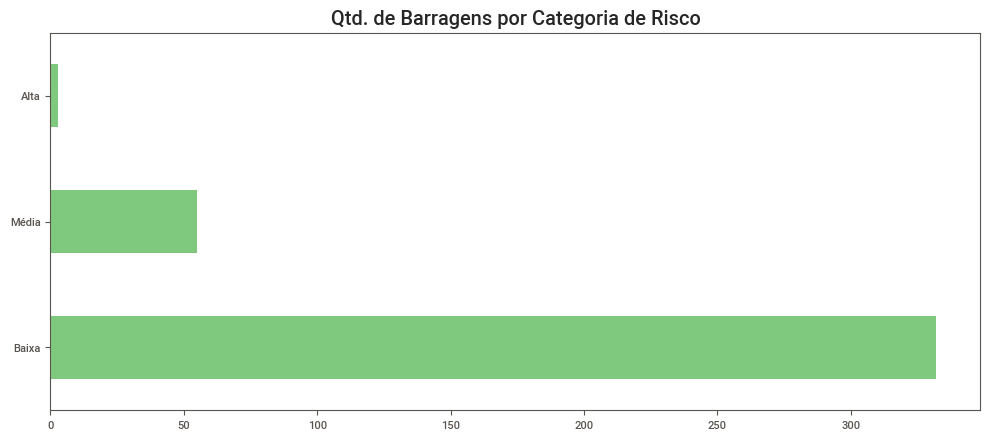

In [ ]:
_ = plt.figure(1, figsize=(12, 5))
_ = dados_barragens["CATEGORIA_DE_RISCO"].value_counts().plot(kind="barh", colormap="Accent")
_ = plt.title("Qtd. de Barragens por Categoria de Risco")

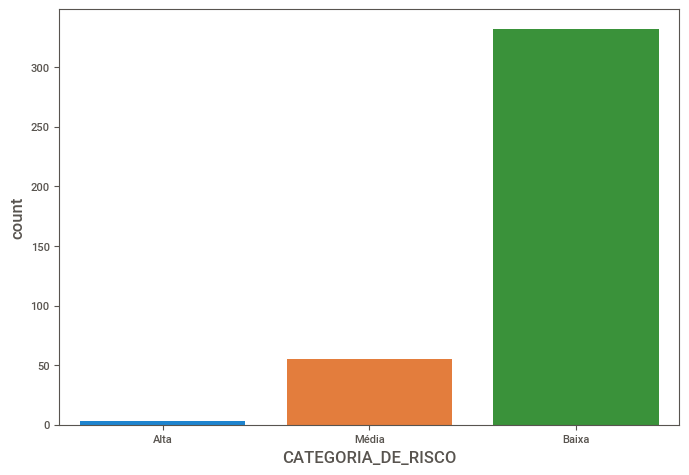

In [ ]:
# Contagem por categoria de risco
_ = sns.countplot(
    x="CATEGORIA_DE_RISCO",
    data=dados_barragens,
    order=dados_barragens["DANO_POTENCIAL_ASSOCIADO"].value_counts().index,
)

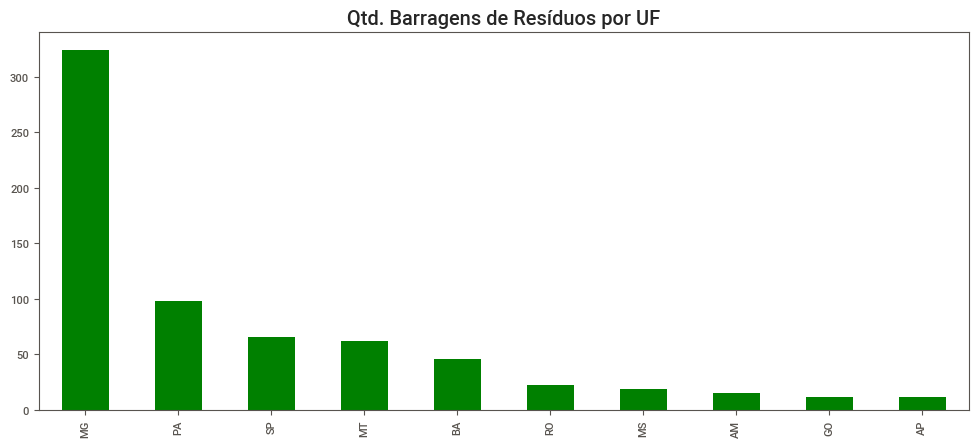

In [ ]:

## Quantidade de Barragens X UF
_ = plt.figure(1, figsize=(12, 5))
_ = dados_barragens["UF"].value_counts()[:10].plot(kind="bar", color="green")
_ = plt.title("Qtd. Barragens de Resíduos por UF")

In [ ]:

dados_barragens = pd.concat(
    [
        dados_barragens,
        pd.get_dummies(dados_barragens["DANO_POTENCIAL_ASSOCIADO"], "Dano_Potencial_"),
    ],
    axis=1,
)

dados_barragens.head()

,POSICIONAMENTO,UF,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE,dummy_PNSB,Categoria_de_Risco_Alta,Categoria_de_Risco_Baixa,Categoria_de_Risco_Média,Dano_Potencial__Alta,Dano_Potencial__Baixa,Dano_Potencial__Média
0,Sul do Equador,AM,Baixa,Média,C,Sim,0.733361,-60.138389,1,0,1,0,0,0,1
1,Sul do Equador,AM,Baixa,Média,C,Sim,0.785722,-60.141917,1,0,1,0,0,0,1
2,Sul do Equador,AM,Baixa,Média,C,Sim,0.789667,-60.144278,1,0,1,0,0,0,1
3,Sul do Equador,AM,Baixa,Alta,B,Sim,0.738028,-60.078917,1,0,1,0,1,0,0
4,Sul do Equador,AM,Baixa,Média,C,Sim,0.732287,-60.068999,1,0,1,0,0,0,1


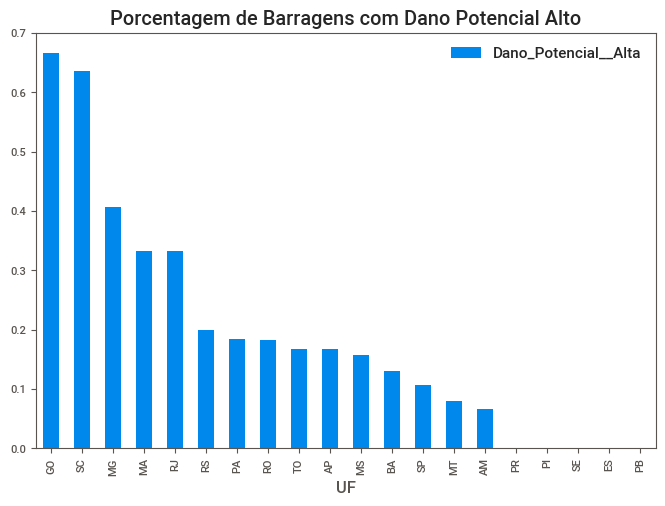

In [ ]:
# Algum estado possui mais barragens por risco?
# Estados com danos percentual alto

_ = (
    pd.pivot_table(
        data=dados_barragens, index=["UF"], values=["Dano_Potencial__Alta"], aggfunc="mean"
    )
    .sort_values(by="Dano_Potencial__Alta", ascending=False)
    .plot(kind="bar")
)
_ = plt.title("Porcentagem de Barragens com Dano Potencial Alto")

In [ ]:
# Risco de acordo com UF
# funçoes com agrupamentos por estados
resumo_por_uf = (
    dados_barragens.groupby(["UF"], sort=False)
    .agg(
        contagem_geral=("Dano_Potencial__Alta", "count"),
        contagem_por_risco_alto=("Dano_Potencial__Alta", "sum"),
        perc_de_risco_alto=("Dano_Potencial__Alta", "mean"),
        Missing_Risco=("CATEGORIA_DE_RISCO", lambda x: x.isnull().mean(),),
        Missing_Dano=("DANO_POTENCIAL_ASSOCIADO", lambda x: x.isnull().mean(),),
    )
    .reset_index()
    .round(1)
)

resumo_por_uf.sort_values(by="contagem_geral", ascending=False).head()

,UF,contagem_geral,contagem_por_risco_alto,perc_de_risco_alto,Missing_Risco,Missing_Dano
6,MG,324,132,0.4,0.4,0.4
9,PA,98,18,0.2,0.3,0.3
16,SP,66,7,0.1,0.7,0.7
8,MT,62,5,0.1,0.5,0.5
2,BA,46,6,0.1,0.7,0.7


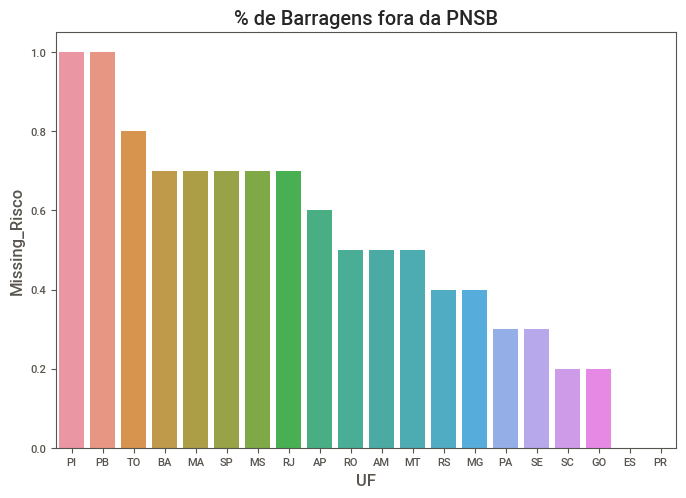

In [ ]:
# percentual fora do PNSB
_ = sns.barplot(
    data=resumo_por_uf.sort_values(by="Missing_Risco", ascending=False),
    x="UF",
    y="Missing_Risco",
)
_ = plt.title("% de Barragens fora da PNSB")

In [ ]:
# verifica valores nulos
dados_barragens.isnull().sum().sort_values(ascending=False)

CLASSE                      324
DANO_POTENCIAL_ASSOCIADO    324
CATEGORIA_DE_RISCO          324
Dano_Potencial__Média         0
Dano_Potencial__Baixa         0
Dano_Potencial__Alta          0
Categoria_de_Risco_Média      0
Categoria_de_Risco_Baixa      0
Categoria_de_Risco_Alta       0
dummy_PNSB                    0
LONGITUDE                     0
LATITUDE                      0
INSERIDA_NA_PNSB              0
UF                            0
POSICIONAMENTO                0
dtype: int64

In [ ]:
# Quantidade de registros distintos em cada coluna
dados_barragens.nunique()

POSICIONAMENTO                2
UF                           20
CATEGORIA_DE_RISCO            3
DANO_POTENCIAL_ASSOCIADO      3
CLASSE                        5
INSERIDA_NA_PNSB              2
LATITUDE                    704
LONGITUDE                   695
dummy_PNSB                    2
Categoria_de_Risco_Alta       2
Categoria_de_Risco_Baixa      2
Categoria_de_Risco_Média      2
Dano_Potencial__Alta          2
Dano_Potencial__Baixa         2
Dano_Potencial__Média         2
dtype: int64

In [ ]:
# Numero de celulas
dados_barragens.size

10710

In [ ]:
#verifica colunas
dados_barragens.columns

Index(['POSICIONAMENTO', 'UF', 'CATEGORIA_DE_RISCO',
       'DANO_POTENCIAL_ASSOCIADO', 'CLASSE', 'INSERIDA_NA_PNSB', 'LATITUDE',
       'LONGITUDE', 'dummy_PNSB', 'Categoria_de_Risco_Alta',
       'Categoria_de_Risco_Baixa', 'Categoria_de_Risco_Média',
       'Dano_Potencial__Alta', 'Dano_Potencial__Baixa',
       'Dano_Potencial__Média'],
      dtype='object')

In [ ]:
# transforma as colunas em lista
dados_barragens.columns.tolist()

['POSICIONAMENTO',
 'UF',
 'CATEGORIA_DE_RISCO',
 'DANO_POTENCIAL_ASSOCIADO',
 'CLASSE',
 'INSERIDA_NA_PNSB',
 'LATITUDE',
 'LONGITUDE',
 'dummy_PNSB',
 'Categoria_de_Risco_Alta',
 'Categoria_de_Risco_Baixa',
 'Categoria_de_Risco_Média',
 'Dano_Potencial__Alta',
 'Dano_Potencial__Baixa',
 'Dano_Potencial__Média']

In [ ]:
# Retorna a quantidade de dimensões
dados_barragens.ndim

2

In [ ]:
#Removendo duplicatas se houver
dados_barragens.drop_duplicates(keep=False, inplace=True)

In [ ]:
# é ou não é missing?
dados_barragens.isna()

,POSICIONAMENTO,UF,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE,dummy_PNSB,Categoria_de_Risco_Alta,Categoria_de_Risco_Baixa,Categoria_de_Risco_Média,Dano_Potencial__Alta,Dano_Potencial__Baixa,Dano_Potencial__Média
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
710,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
711,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
712,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Informações estatistica da base de dados.
dados_barragens.describe().round(2)

,LATITUDE,LONGITUDE,dummy_PNSB,Categoria_de_Risco_Alta,Categoria_de_Risco_Baixa,Categoria_de_Risco_Média,Dano_Potencial__Alta,Dano_Potencial__Baixa,Dano_Potencial__Média
count,699.00,699.00,699.00,699.00,699.00,699.00,699.00,699.00,699.00
mean,-333.67,-805.23,0.55,0.00,0.47,0.08,0.28,0.06,0.21
std,2400.51,6052.70,0.50,0.07,0.50,0.27,0.45,0.24,0.41
min,-23662.00,-63076.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-20.29,-51.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-19.78,-46.21,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,-11.29,-43.84,1.00,0.00,1.00,0.00,1.00,0.00,0.00
max,1.71,-37.03,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
# Variáveis categóricas:
dados_barragens.describe(include=['O'])

,POSICIONAMENTO,UF,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB
count,699,699,384,384,384,699
unique,2,20,3,3,5,2
top,Sul do Equador,MG,Baixa,Alta,B,Sim
freq,690,321,326,193,192,384


In [ ]:
dados_barragens.describe(include=['object'])

,POSICIONAMENTO,UF,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB
count,699,699,384,384,384,699
unique,2,20,3,3,5,2
top,Sul do Equador,MG,Baixa,Alta,B,Sim
freq,690,321,326,193,192,384


In [ ]:
#Matriz de correlação - person
dados_barragens.corr().round(4)

,LATITUDE,LONGITUDE,dummy_PNSB,Categoria_de_Risco_Alta,Categoria_de_Risco_Baixa,Categoria_de_Risco_Média,Dano_Potencial__Alta,Dano_Potencial__Baixa,Dano_Potencial__Média
LATITUDE,1.0000,-0.0167,0.0311,0.0086,0.0491,-0.0356,0.0231,-0.0644,0.0510
LONGITUDE,-0.0167,1.0000,-0.0486,0.0082,-0.0692,0.0364,-0.1071,0.0325,0.0389
dummy_PNSB,0.0311,-0.0486,1.0000,0.0595,0.8467,0.2647,0.5594,0.2347,0.4674
Categoria_de_Risco_Alta,0.0086,0.0082,0.0595,1.0000,-0.0614,-0.0192,0.0574,-0.0170,0.0198
Categoria_de_Risco_Baixa,0.0491,-0.0692,0.8467,-0.0614,1.0000,-0.2732,0.5580,0.1828,0.3127
Categoria_de_Risco_Média,-0.0356,0.0364,0.2647,-0.0192,-0.2732,1.0000,-0.0141,0.0993,0.2795
Dano_Potencial__Alta,0.0231,-0.1071,0.5594,0.0574,0.5580,-0.0141,1.0000,-0.1601,-0.3187
Dano_Potencial__Baixa,-0.0644,0.0325,0.2347,-0.0170,0.1828,0.0993,-0.1601,1.0000,-0.1338
Dano_Potencial__Média,0.0510,0.0389,0.4674,0.0198,0.3127,0.2795,-0.3187,-0.1338,1.0000


In [ ]:
# Correlação de spearman - leva em consideração  a correlação positiva e negativa
dados_barragens.corr('spearman').round(4)

,LATITUDE,LONGITUDE,dummy_PNSB,Categoria_de_Risco_Alta,Categoria_de_Risco_Baixa,Categoria_de_Risco_Média,Dano_Potencial__Alta,Dano_Potencial__Baixa,Dano_Potencial__Média
LATITUDE,1.0000,-0.3185,0.0189,-0.0004,0.0452,-0.0488,-0.1281,-0.0460,0.1910
LONGITUDE,-0.3185,1.0000,-0.0192,0.0112,0.0761,-0.1793,0.1752,0.0099,-0.2216
dummy_PNSB,0.0189,-0.0192,1.0000,0.0595,0.8467,0.2647,0.5594,0.2347,0.4674
Categoria_de_Risco_Alta,-0.0004,0.0112,0.0595,1.0000,-0.0614,-0.0192,0.0574,-0.0170,0.0198
Categoria_de_Risco_Baixa,0.0452,0.0761,0.8467,-0.0614,1.0000,-0.2732,0.5580,0.1828,0.3127
Categoria_de_Risco_Média,-0.0488,-0.1793,0.2647,-0.0192,-0.2732,1.0000,-0.0141,0.0993,0.2795
Dano_Potencial__Alta,-0.1281,0.1752,0.5594,0.0574,0.5580,-0.0141,1.0000,-0.1601,-0.3187
Dano_Potencial__Baixa,-0.0460,0.0099,0.2347,-0.0170,0.1828,0.0993,-0.1601,1.0000,-0.1338
Dano_Potencial__Média,0.1910,-0.2216,0.4674,0.0198,0.3127,0.2795,-0.3187,-0.1338,1.0000


In [ ]:
# selecionar apenas colunas de objeto
dados_barragens.select_dtypes(include='object').head()

,POSICIONAMENTO,UF,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB
0,Sul do Equador,AM,Baixa,Média,C,Sim
1,Sul do Equador,AM,Baixa,Média,C,Sim
2,Sul do Equador,AM,Baixa,Média,C,Sim
3,Sul do Equador,AM,Baixa,Alta,B,Sim
4,Sul do Equador,AM,Baixa,Média,C,Sim


In [ ]:
# Selecionar as colunas numéricas
dados_barragens.select_dtypes(include='number').head()

,LATITUDE,LONGITUDE,dummy_PNSB,Categoria_de_Risco_Alta,Categoria_de_Risco_Baixa,Categoria_de_Risco_Média,Dano_Potencial__Alta,Dano_Potencial__Baixa,Dano_Potencial__Média
0,0.733361,-60.138389,1,0,1,0,0,0,1
1,0.785722,-60.141917,1,0,1,0,0,0,1
2,0.789667,-60.144278,1,0,1,0,0,0,1
3,0.738028,-60.078917,1,0,1,0,1,0,0
4,0.732287,-60.068999,1,0,1,0,0,0,1


In [ ]:
# selecionar vários tipos de dados
dados_barragens.select_dtypes(include=['int', 'datetime', 'object']).head()

,POSICIONAMENTO,UF,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,dummy_PNSB
0,Sul do Equador,AM,Baixa,Média,C,Sim,1
1,Sul do Equador,AM,Baixa,Média,C,Sim,1
2,Sul do Equador,AM,Baixa,Média,C,Sim,1
3,Sul do Equador,AM,Baixa,Alta,B,Sim,1
4,Sul do Equador,AM,Baixa,Média,C,Sim,1


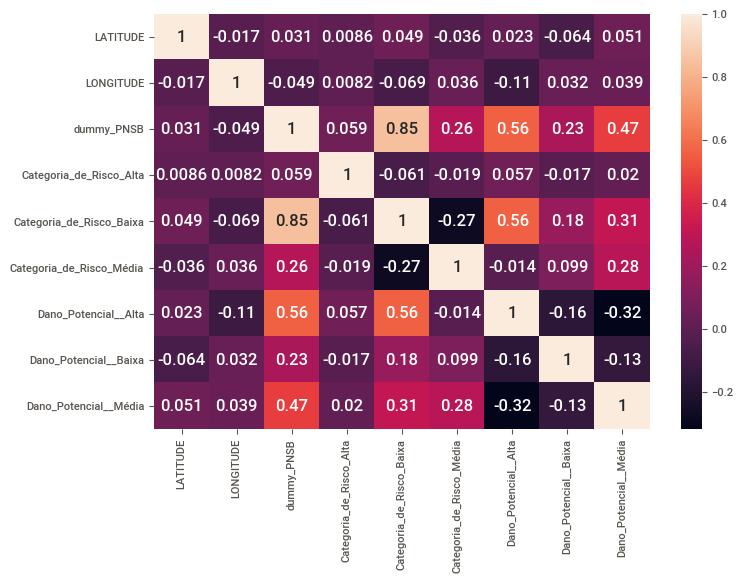

In [ ]:
#plot de correlação dos dados
fig = sns.heatmap(dados_barragens.corr(), annot=True)
fig = plt.gcf()
plt.show();

# No dataframe existe muito valores faltantes.

! Possiveis soluções:

  1 Excluir valores ausentes
 Esta é uma decisão mais radical, e deve ser feita apenas em casos onde não haverá impacto significativo no modelo.

  2  Preencher valores ausentes
 Esta abordagem é a mais utilizada, pois você não joga fora informação útil.

  3   Usar valor mais frequente
 Para preencher missing values no último exemplo, usamos a mediana da coluna.

In [ ]:
#verificar qual o valor mais frequente e usar ele no preenchimento se for o caso
print(dados_barragens.CATEGORIA_DE_RISCO.value_counts())
#Uso_Complementar_freq = dados_barragens.Uso_Complementar.value_counts()[0]

# prencher missing values com valor acima
#dados_barragens.Uso_Complementar.fillna(Uso_Complementar_freq, inplace=True)

# verificar se ha valor ausente
#dados_barragens.isnull().sum()

Baixa    326
Média     55
Alta       3
Name: CATEGORIA_DE_RISCO, dtype: int64


['Média' 'Alta' 'Baixa' nan]
Alta     193
Média    147
Baixa     44
Name: DANO_POTENCIAL_ASSOCIADO, dtype: int64


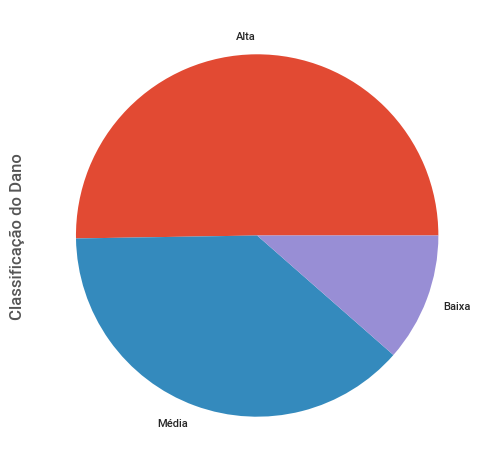

In [ ]:
# Tipos de classificações existentes na base de dados
plt.style.use("ggplot")
print(dados_barragens['DANO_POTENCIAL_ASSOCIADO'].unique())

# Podemos observar que incidentes, menos grave, são os tipos de ocorrência mais comum
print(dados_barragens['DANO_POTENCIAL_ASSOCIADO'].value_counts())

#Visualizando melhor em um gráfico
dados_barragens['DANO_POTENCIAL_ASSOCIADO'].value_counts().plot(kind='pie', subplots=True, label="Classificação do Dano" ,figsize=(6, 6));

['Baixa' 'Média' 'Alta' nan]
Baixa    326
Média     55
Alta       3
Name: CATEGORIA_DE_RISCO, dtype: int64


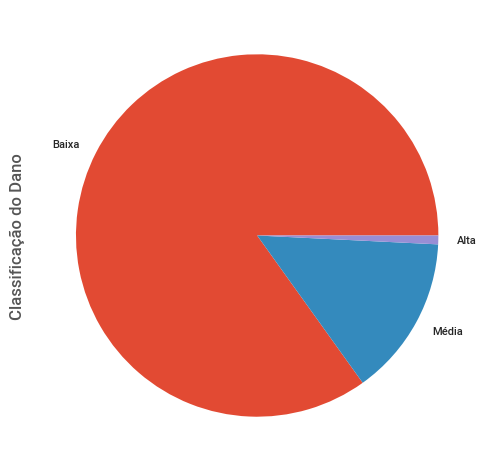

In [ ]:
# Tipos de classificações existentes na base de dados
plt.style.use("ggplot")
print(dados_barragens['CATEGORIA_DE_RISCO'].unique())

# Podemos observar que incidentes, menos grave, são os tipos de ocorrência mais comum
print(dados_barragens['CATEGORIA_DE_RISCO'].value_counts())

#Visualizando melhor em um gráfico
dados_barragens['CATEGORIA_DE_RISCO'].value_counts().plot(kind='pie', subplots=True, label="Classificação do Dano" ,figsize=(6, 6));

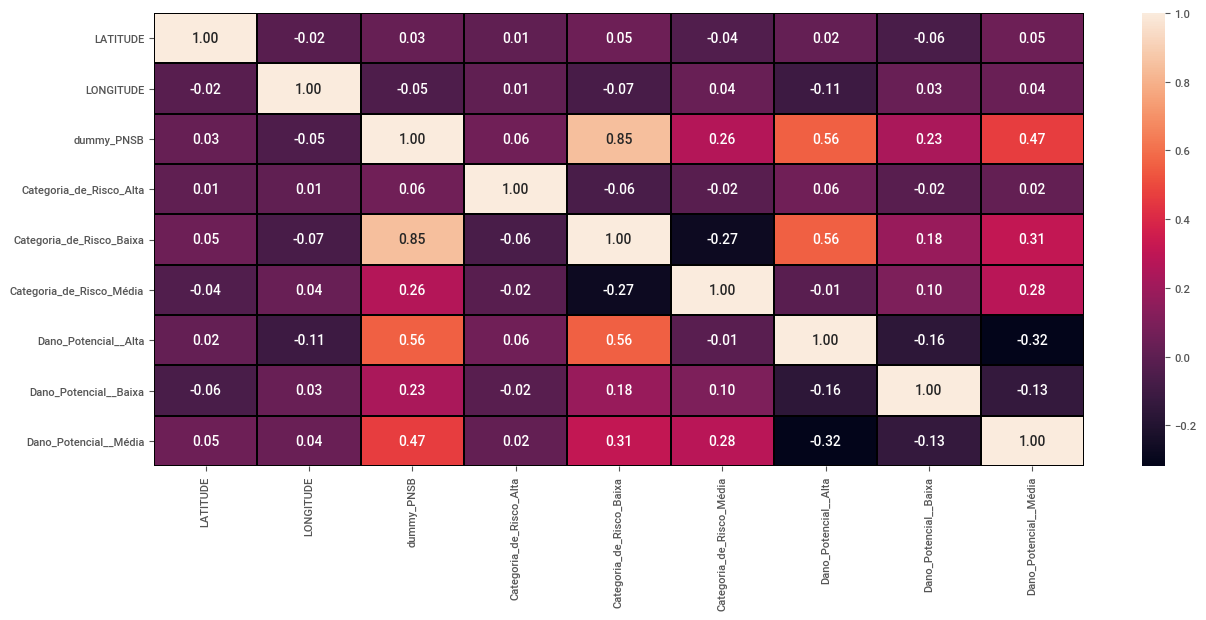

In [ ]:
# Expondo as correlações entre as variáveis
f, ax = plt.subplots(figsize=(15,6))
sns.heatmap(dados_barragens.corr(), annot=True, fmt='.2f', ax=ax, linecolor='black', lw=.7);

In [ ]:
# MG,tem a maior quantidade de barragens X Dano Potencial associado
por_estado = dados_barragens.groupby('UF')['DANO_POTENCIAL_ASSOCIADO'].count().sort_values(ascending=[False])
por_estado

UF
MG    200
PA     58
MT     31
SP     20
BA     13
RO     12
GO     10
SC      9
AM      8
MS      6
AP      5
PR      3
RS      3
SE      2
RJ      1
MA      1
ES      1
TO      1
PB      0
PI      0
Name: DANO_POTENCIAL_ASSOCIADO, dtype: int64

In [ ]:
#Quantidade de barragem em cada estado
dados_barragens['UF'].value_counts()[:10]

MG    321
PA     92
SP     66
MT     60
BA     46
RO     20
MS     17
AM     15
GO     12
AP     12
Name: UF, dtype: int64

In [ ]:
dados_barragens.head(3).T

,0,1,2
POSICIONAMENTO,Sul do Equador,Sul do Equador,Sul do Equador
UF,AM,AM,AM
CATEGORIA_DE_RISCO,Baixa,Baixa,Baixa
DANO_POTENCIAL_ASSOCIADO,Média,Média,Média
CLASSE,C,C,C
INSERIDA_NA_PNSB,Sim,Sim,Sim
LATITUDE,0.733361,0.785722,0.789667
LONGITUDE,-60.1384,-60.1419,-60.1443
dummy_PNSB,1,1,1
Categoria_de_Risco_Alta,0,0,0


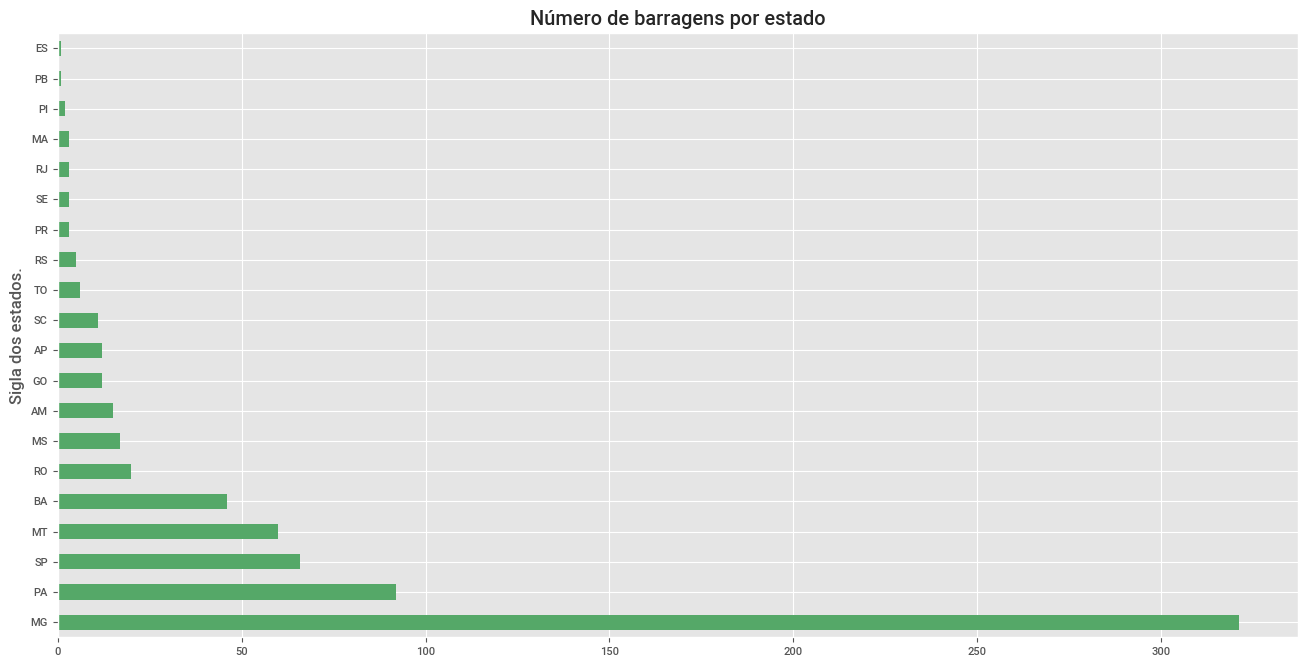

In [ ]:
plt.figure(1 ,figsize =(16 , 8))
dados_barragens['UF'].value_counts().plot(kind='barh', color='g')
plt.title('Número de barragens por estado')
plt.ylabel('Sigla dos estados.')
plt.show();

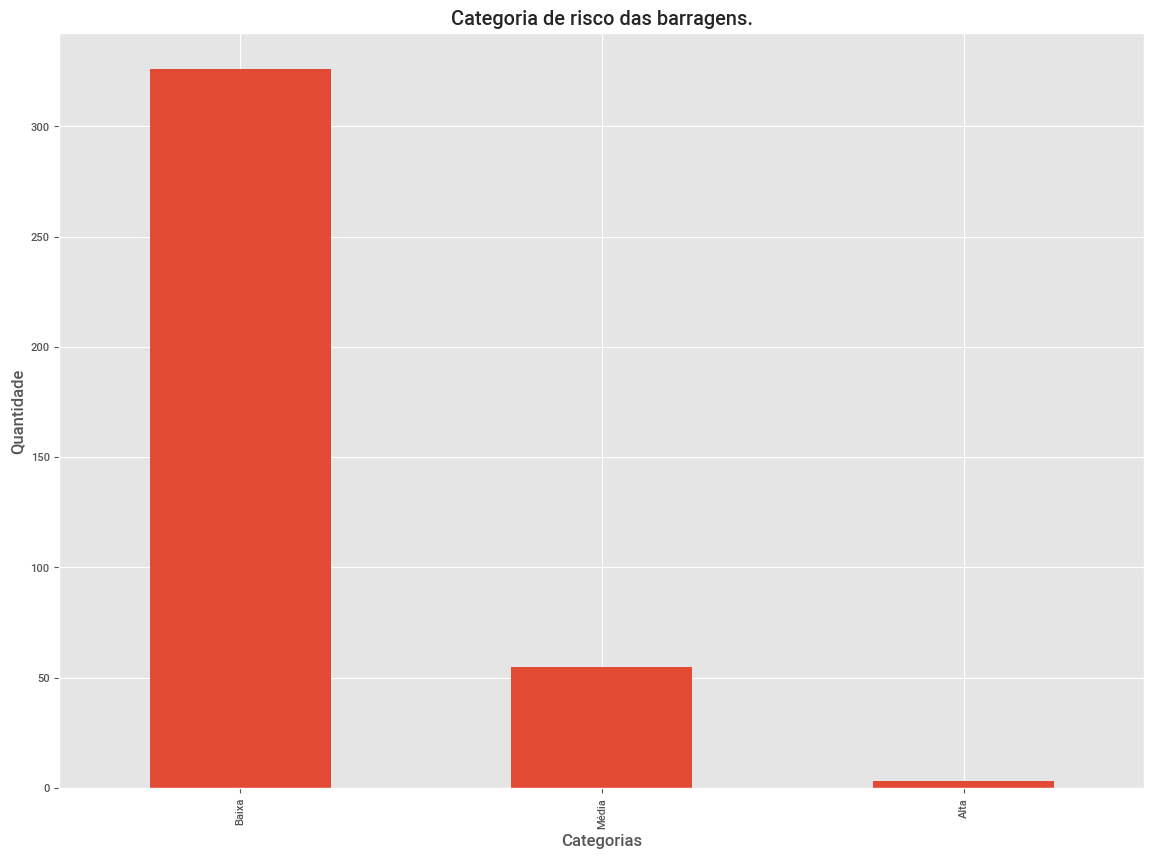

In [ ]:
plt.figure(figsize=(14,10))
plt.title("Categoria de risco das barragens.")
plt.ylabel("Quantidade")
plt.xlabel("Categorias")
dados_barragens['CATEGORIA_DE_RISCO'].value_counts().plot(kind='bar');

In [ ]:
# Dez estados com mais barragens

uf = dados_barragens['UF'].value_counts()[:10]
data = [go.Bar(x=uf.values, y=uf.index, orientation='h', name='Quantidade:'),
        go.Bar(x=[dados_barragens.shape[0]], y=['Total'], orientation='h', name='Total de barragens.')
        ]
layout = go.Layout(title="Dez estados com mais barragens.",            
                    yaxis=dict(
                            showgrid=False,
                            showline=False,
                            showticklabels=True,
                            zeroline=False,
                            title="Estados(UF)",
                            ),
                  )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

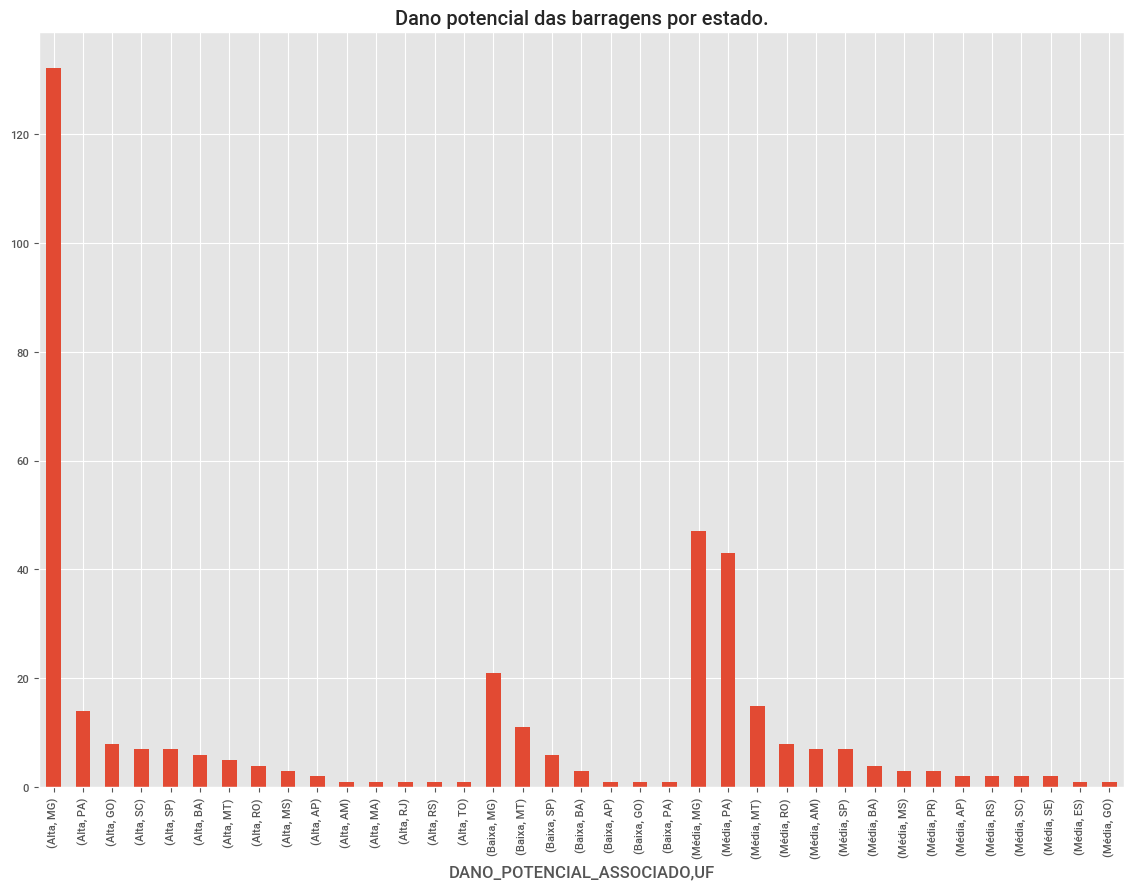

In [ ]:
plt.figure(figsize=(14,10))
plt.title("Dano potencial das barragens por estado.")
dados_barragens.groupby(['DANO_POTENCIAL_ASSOCIADO'])['UF'].value_counts().plot(kind='bar');

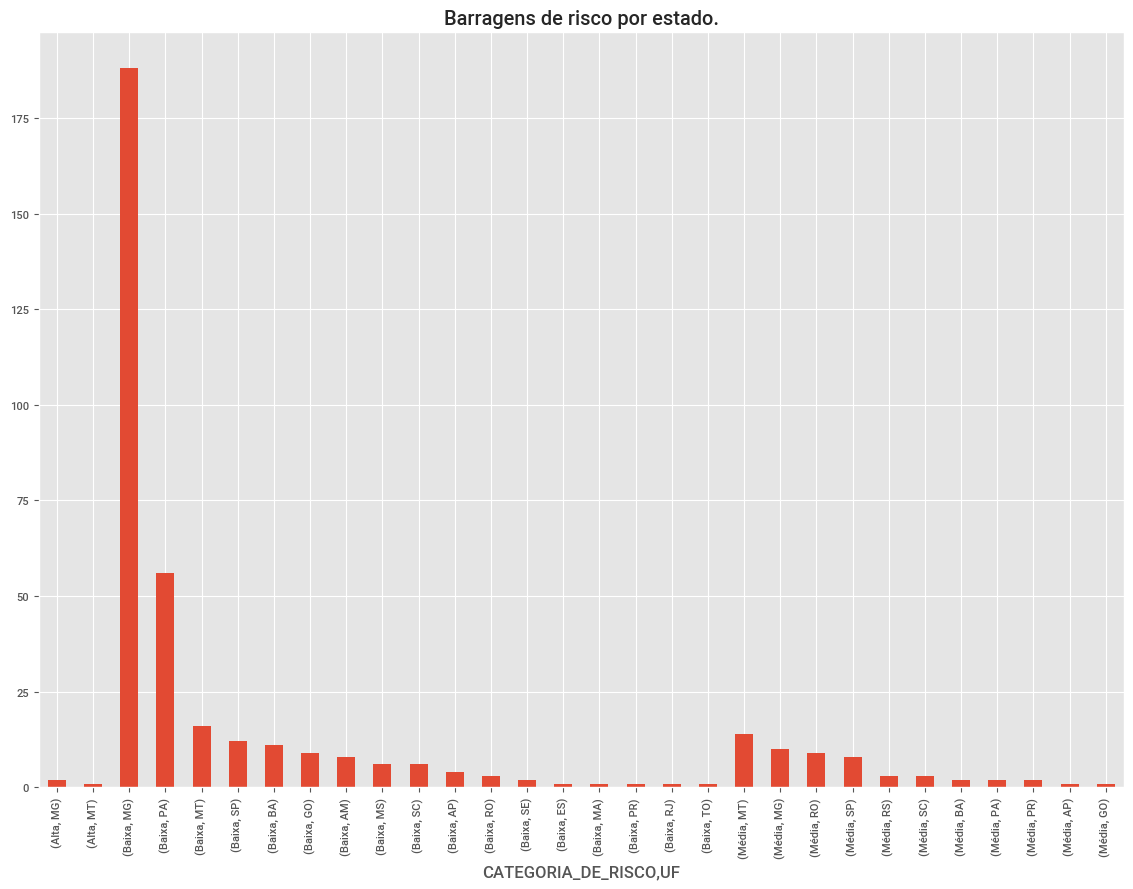

In [ ]:
plt.figure(figsize=(14,10))
plt.title("Barragens de risco por estado.")
dados_barragens.groupby(['CATEGORIA_DE_RISCO'])['UF'].value_counts().plot(kind='bar');

In [ ]:
#Relação dos Risco x Danos. 
dados_barragens.groupby('CATEGORIA_DE_RISCO')['DANO_POTENCIAL_ASSOCIADO'].value_counts().head(20)

CATEGORIA_DE_RISCO  DANO_POTENCIAL_ASSOCIADO
Alta                Alta                          2
                    Média                         1
Baixa               Alta                        177
                    Média                       113
                    Baixa                        36
Média               Média                        33
                    Alta                         14
                    Baixa                         8
Name: DANO_POTENCIAL_ASSOCIADO, dtype: int64

In [ ]:
# Cruzando os valores das variaveis 
# podemos ver a distribuição dos dados
pd.crosstab(dados_barragens['CATEGORIA_DE_RISCO'],dados_barragens['UF'])

UF,AM,AP,BA,ES,GO,MA,MG,MS,MT,PA,PR,RJ,RO,RS,SC,SE,SP,TO
CATEGORIA_DE_RISCO,,,,,,,,,,,,,,,,,,
Alta,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0
Baixa,8,4,11,1,9,1,188,6,16,56,1,1,3,0,6,2,12,1
Média,0,1,2,0,1,0,10,0,14,2,2,0,9,3,3,0,8,0


In [ ]:
dados_barragens.head()

,POSICIONAMENTO,UF,CATEGORIA_DE_RISCO,DANO_POTENCIAL_ASSOCIADO,CLASSE,INSERIDA_NA_PNSB,LATITUDE,LONGITUDE,dummy_PNSB,Categoria_de_Risco_Alta,Categoria_de_Risco_Baixa,Categoria_de_Risco_Média,Dano_Potencial__Alta,Dano_Potencial__Baixa,Dano_Potencial__Média
0,Sul do Equador,AM,Baixa,Média,C,Sim,0.733361,-60.138389,1,0,1,0,0,0,1
1,Sul do Equador,AM,Baixa,Média,C,Sim,0.785722,-60.141917,1,0,1,0,0,0,1
2,Sul do Equador,AM,Baixa,Média,C,Sim,0.789667,-60.144278,1,0,1,0,0,0,1
3,Sul do Equador,AM,Baixa,Alta,B,Sim,0.738028,-60.078917,1,0,1,0,1,0,0
4,Sul do Equador,AM,Baixa,Média,C,Sim,0.732287,-60.068999,1,0,1,0,0,0,1


In [ ]:
# Salvando o Dataframe:
dados_barragens.to_csv('barragens2019_Aanálise.csv', sep=';', index=False)